### Ejemplo de la presentación de Dani utilizando Jupyter y scipy.signal
La ecuación en diferencias a modelar es:
$$ y(n) = x(n) + \frac{3}{2} \cdot y(n-1) - \frac{1}{2} \cdot y(n-2) $$

In [9]:
import scipy.signal as ss
import matplotlib.pyplot as plt
import numpy as np

Los coeficientes de *a* y *b* corresponden a la siguiente fracción obtenida de la transformación Z de la ecuación en diferencias:
$$ \frac{Y(z)}{X(z)} = \frac{1}{1 - \frac{3}{2} \cdot z^{-1} + \frac{1}{2} z^{-2}} $$

In [10]:
b = [1]
a = [1, -3/2, 1/2]

No se tienen condiciones iniciales de *x*, pero sí de *y*, y se computan de la siguiente manera: 

In [11]:
y_init = [4, 10]
z = ss.lfiltic(b, a, y_init)
print(z)

[ 1. -2.]


Se genera una señal delta hasta n=30:

In [12]:
delta = ss.unit_impulse(30)
print(delta)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [17]:
y, yfc = ss.lfilter(b, a, delta, zi=z)
print(y)

[2.00000000e+00 1.00000000e+00 5.00000000e-01 2.50000000e-01
 1.25000000e-01 6.25000000e-02 3.12500000e-02 1.56250000e-02
 7.81250000e-03 3.90625000e-03 1.95312500e-03 9.76562500e-04
 4.88281250e-04 2.44140625e-04 1.22070312e-04 6.10351562e-05
 3.05175781e-05 1.52587891e-05 7.62939453e-06 3.81469727e-06
 1.90734863e-06 9.53674316e-07 4.76837158e-07 2.38418579e-07
 1.19209290e-07 5.96046448e-08 2.98023224e-08 1.49011612e-08
 7.45058060e-09 3.72529030e-09]


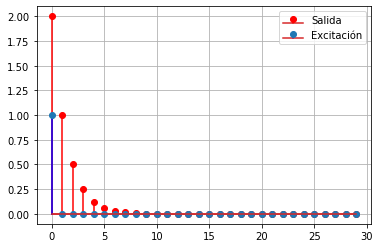

In [24]:
plt.stem(np.arange(0, 30), y, 'r', label='Salida', markerfmt='ro')
plt.stem(np.arange(0, 30), delta, 'b', label='Excitación')
plt.grid(True)
plt.legend()
plt.show()